<a href="https://colab.research.google.com/github/Bobr48/Parking_vision/blob/main/Parking_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Создадим нейросеть, которая считает машины на парковке.

Можно будет применить для обработки видео с камер, уставновленных на автомойках. Так сможем атоматизировать подсчёт машин в очереди. На ТЦ и БЦ, что бы знать оставшиеся места парковки и т.д.

Сначала скачиваем небольшой датасет размеченых вертикально снятых кадров с парковок на 280 фото с Kaggle

In [ ]:
!kaggle datasets download braunge/aerial-view-car-detection-for-yolov5

!mkdir datasets
!unzip -qo "aerial-view-car-detection-for-yolov5" -d datasets


Dataset URL: https://www.kaggle.com/datasets/braunge/aerial-view-car-detection-for-yolov5
License(s): ODbL-1.0
 99% 67.0M/67.7M [00:04<00:00, 24.4MB/s]
100% 67.7M/67.7M [00:04<00:00, 17.2MB/s]


Устанавливаем и импортируем необходимые библиотеки

In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 58.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
import ultralytics

from ultralytics import YOLO
import os
from PIL import Image
import cv2
from IPython.display import Video
import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

ultralytics.checks()

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.3/112.6 GB disk)


In [ ]:
yaml_path = 'datasets/mydata.yaml'

Исправляем yaml для записи путей выборки

In [ ]:
from os import listdir
from os.path import isfile, join
import yaml
from glob import glob

cwd = 'datasets/'

with open(join( cwd , 'train.txt'), 'w') as f:
    for path in glob('datasets/mydata/mydata/images/train/*'):
        f.write(path+'\n')

with open(join( cwd , 'test.txt'), 'w') as f:
    for path in glob('datasets/mydata/mydata/images/test/*'):
        f.write(path+'\n')

data = dict(
    train = join('', 'train.txt'),
    val   = join('', 'test.txt'),
    nc    = 1,
    names = ['car']
    )

with open(join( '' , 'mydata.yaml'), 'w') as outfile:
    yaml.dump(data, outfile, default_flow_style=False)

f = open(join( cwd , 'mydata.yaml'), 'r')
print('\nyaml:')
print(f.read())


yaml:
train: /kaggle/working/ultralytics/mydata/images/train  # train images (relative to 'path') 128 images
val: /kaggle/working/ultralytics/mydata/images/val  # val images (relative to 'path') 128 images

# Classes
nc: 1  # number of classes
names: ['car']  # class names






Скачиваем и дообучаем YOLO11.

Обучеине произведём на 15 эпохах, с батчем в 32 изображения.

In [ ]:
model = YOLO('yolo11s.pt')

100%|██████████| 18.4M/18.4M [00:00<00:00, 330MB/s]


In [ ]:
yaml_path = 'mydata.yaml'

In [ ]:
results = model.train(
    data=yaml_path,   # путь к конфигурационному файлу
    epochs=15,        # число эпох
    batch=32,         # размер пакета
    imgsz=640,        # размер входного изображения
    plots= True       # сохранять графики
)

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=mydata.yaml, epochs=15, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wid

100%|██████████| 755k/755k [00:00<00:00, 150MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 190MB/s]


AMP: checks passed ✅


train: Scanning datasets/mydata/mydata/labels/train... 280 images, 0 backgrounds, 0 corrupt: 100%|██████████| 280/280 [00:00<00:00, 421.94it/s]

train: New cache created: datasets/mydata/mydata/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning datasets/mydata/mydata/labels/test... 19 images, 0 backgrounds, 0 corrupt: 100%|██████████| 19/19 [00:00<00:00, 278.25it/s]

val: New cache created: datasets/mydata/mydata/labels/test.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      8.45G      1.155       2.75       1.22        622        640: 100%|██████████| 9/9 [00:09<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.92s/it]

                   all         19        459      0.624      0.693      0.732      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      8.67G     0.8885     0.8233     0.9785        702        640: 100%|██████████| 9/9 [00:10<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         19        459      0.989      0.937      0.981      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      8.45G     0.8359     0.5634     0.9198        646        640: 100%|██████████| 9/9 [00:06<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all         19        459      0.921      0.983      0.986      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      8.66G      0.818      0.491     0.9172        663        640: 100%|██████████| 9/9 [00:06<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         19        459      0.916      0.961      0.977      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      8.24G     0.8198     0.4686     0.9193        646        640: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         19        459       0.89      0.965      0.973      0.749


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      7.81G     0.7863     0.4524     0.9097        394        640: 100%|██████████| 9/9 [00:10<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         19        459      0.882      0.948      0.929      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      7.79G     0.7661     0.4253     0.8949        380        640: 100%|██████████| 9/9 [00:05<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all         19        459      0.642      0.959      0.648      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15       8.2G     0.7786     0.4203     0.8986        461        640: 100%|██████████| 9/9 [00:05<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         19        459      0.976      0.968      0.988      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      8.27G      0.774     0.4153     0.8974        387        640: 100%|██████████| 9/9 [00:05<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all         19        459      0.987      0.974      0.989      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      7.91G       0.77     0.4066     0.8924        397        640: 100%|██████████| 9/9 [00:05<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         19        459      0.973      0.974      0.987      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      8.08G     0.7536     0.3946     0.8915        392        640: 100%|██████████| 9/9 [00:04<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

                   all         19        459      0.985      0.972      0.991      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      8.05G     0.7383     0.3797     0.8847        533        640: 100%|██████████| 9/9 [00:05<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         19        459      0.987      0.976      0.993      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      8.05G     0.7269     0.3686     0.8853        450        640: 100%|██████████| 9/9 [00:05<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

                   all         19        459      0.982      0.987      0.992      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      8.12G      0.711      0.358     0.8807        463        640: 100%|██████████| 9/9 [00:05<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         19        459      0.993      0.983      0.993      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      8.13G     0.7024     0.3497     0.8763        364        640: 100%|██████████| 9/9 [00:05<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         19        459      0.992      0.985      0.993       0.82



15 epochs completed in 0.041 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 19.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]


                   all         19        459      0.992      0.985      0.993       0.82
Speed: 0.2ms preprocess, 4.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train


In [ ]:
import glob

In [ ]:
def result_train(path):
    img = cv2.imread(path)
    plt.figure(figsize=(10,10), dpi= 200)
    plt.imshow(img)
    print(img.shape)

Выведем предсказаные изображеиня на тренировочной выборки

In [ ]:
data_dir = "/content/runs/detect/train"
img_dir = os.path.join(data_dir, 'train_batch*.jpg')
files = glob.glob(img_dir)
imgs = []
for image in files:
    result_train(image)

Построим матрицу соответствия

(2250, 3000, 3)


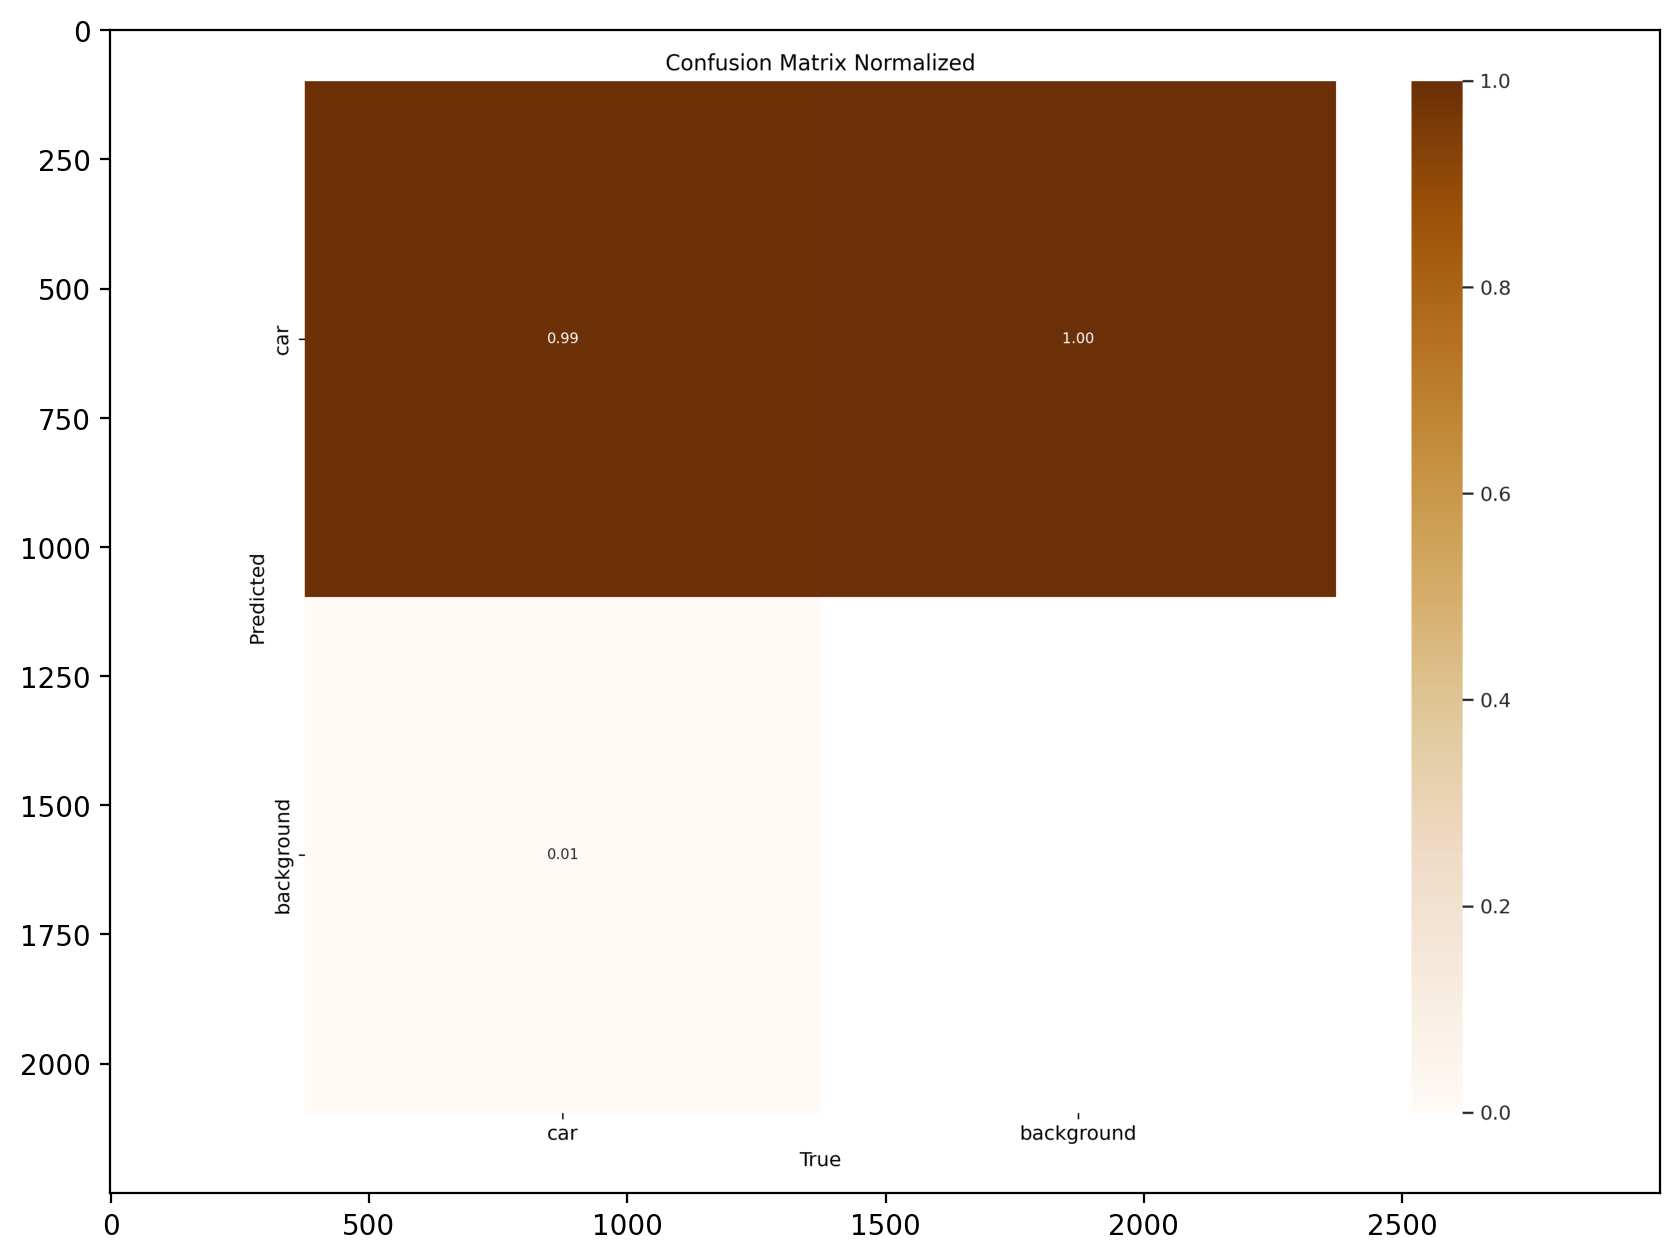

In [ ]:
img_dir = os.path.join(data_dir, 'confusion_matrix_normalized.png')

result_train(img_dir)

И выведем графики обучения

(1500, 2250, 3)
(1500, 2250, 3)
(1500, 2250, 3)
(1500, 2250, 3)


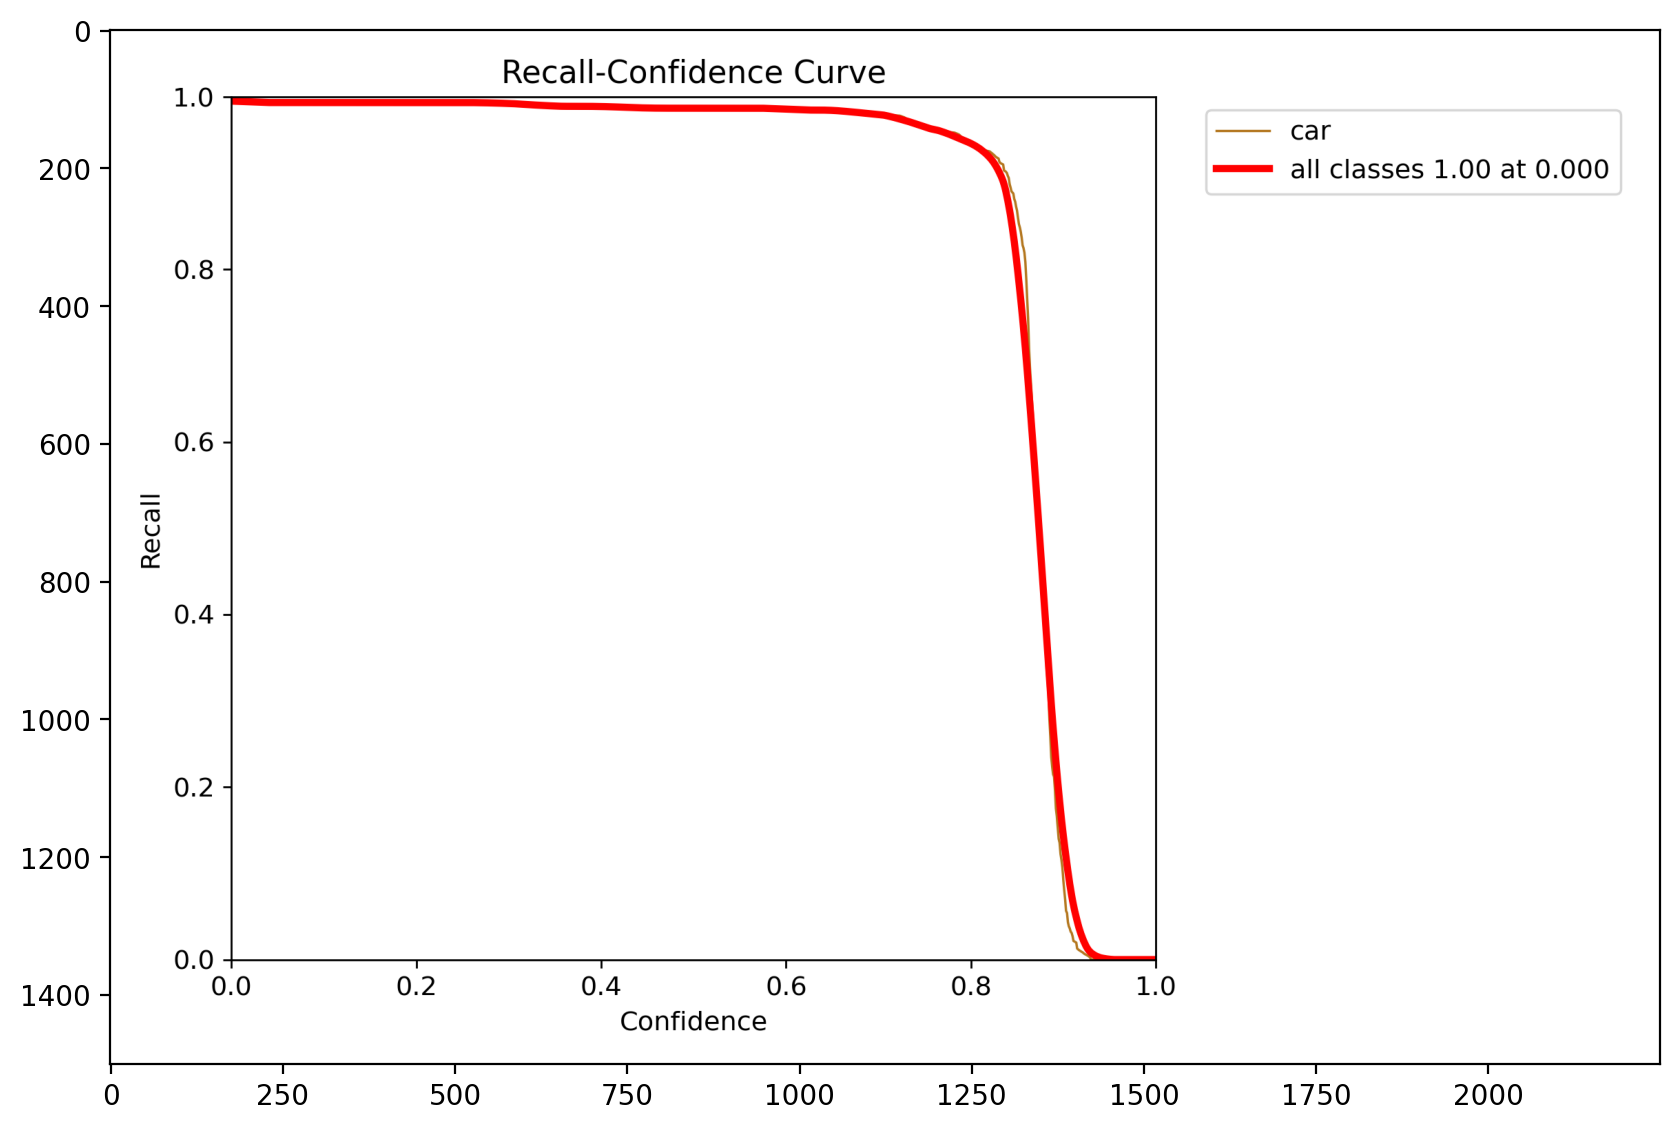

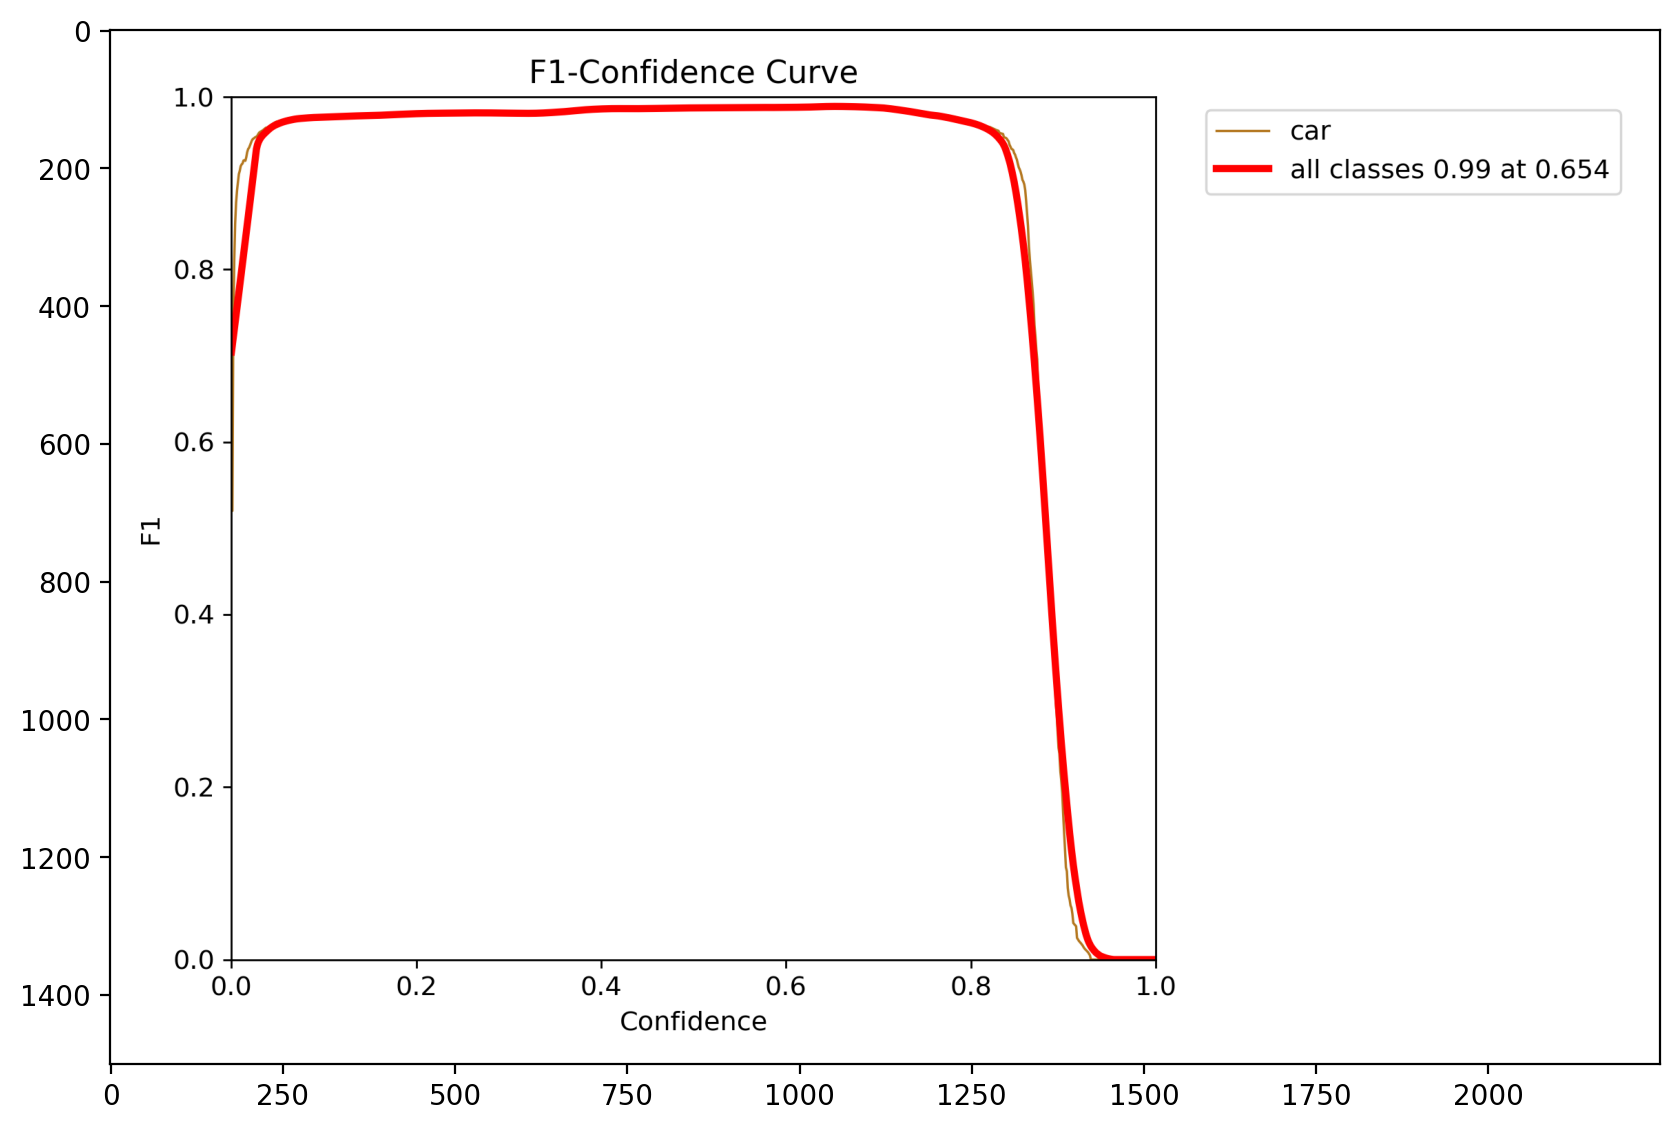

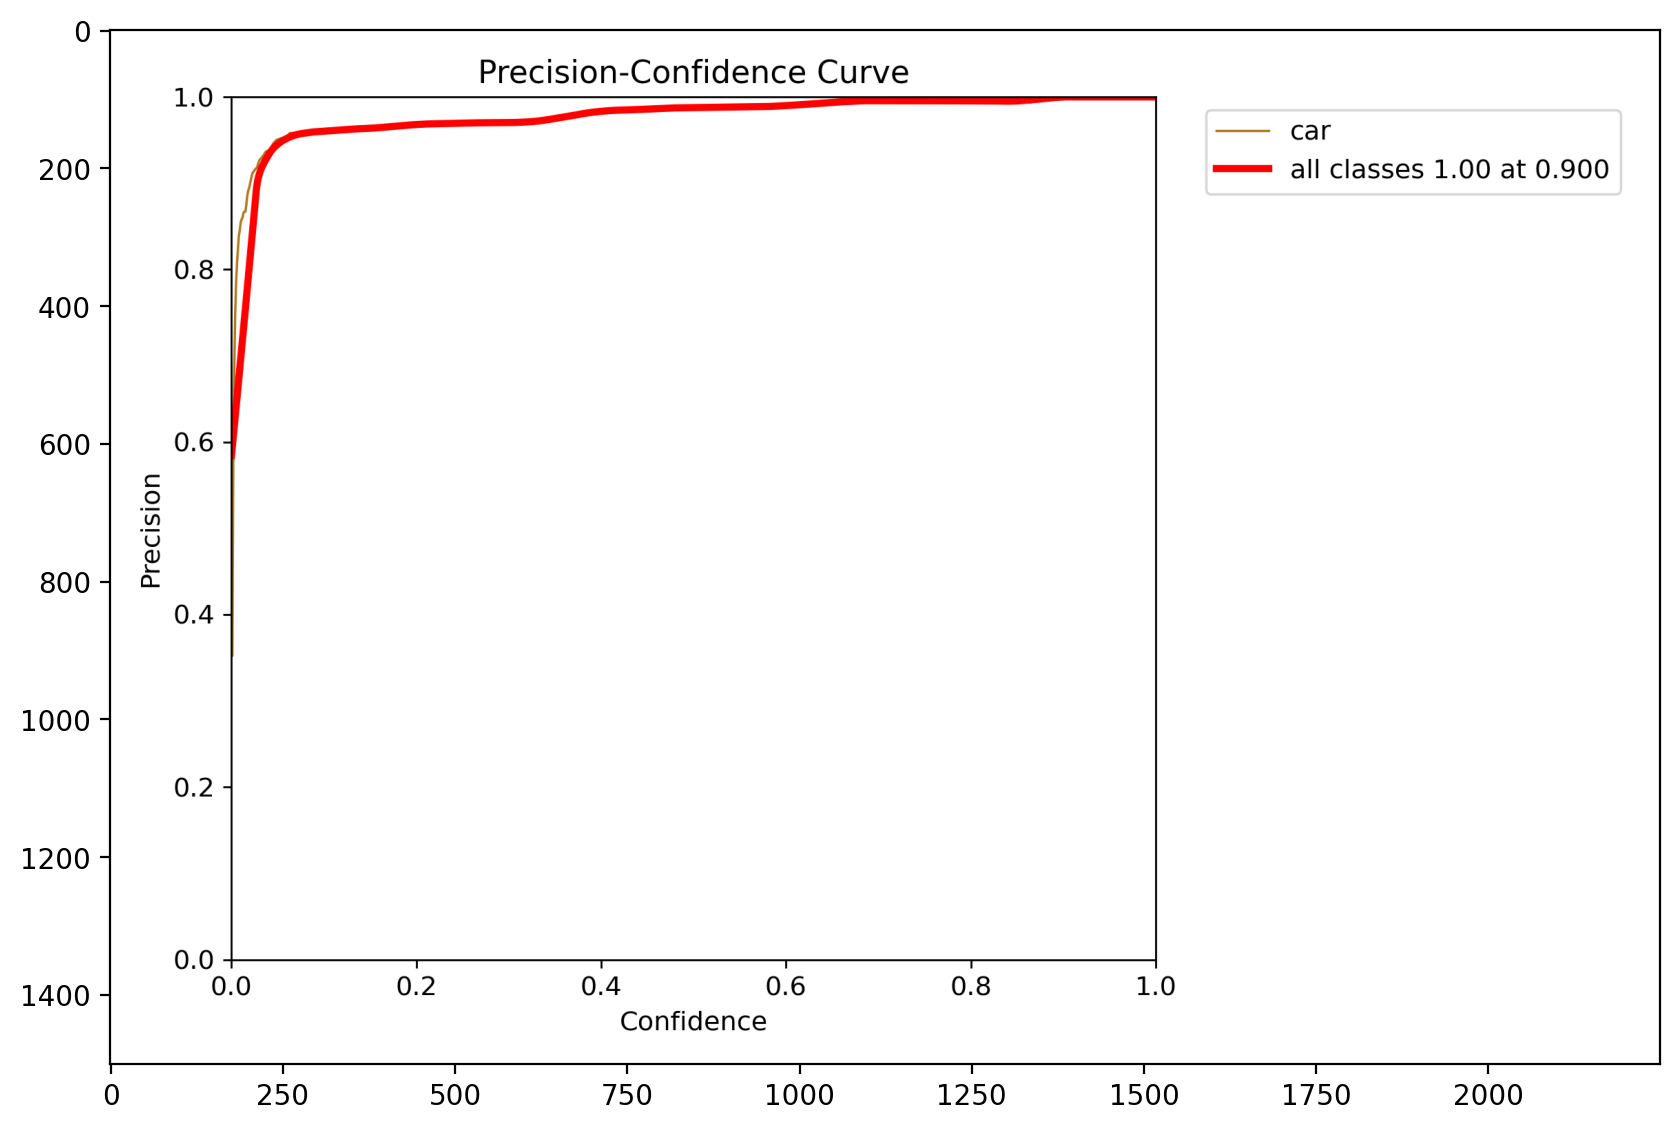

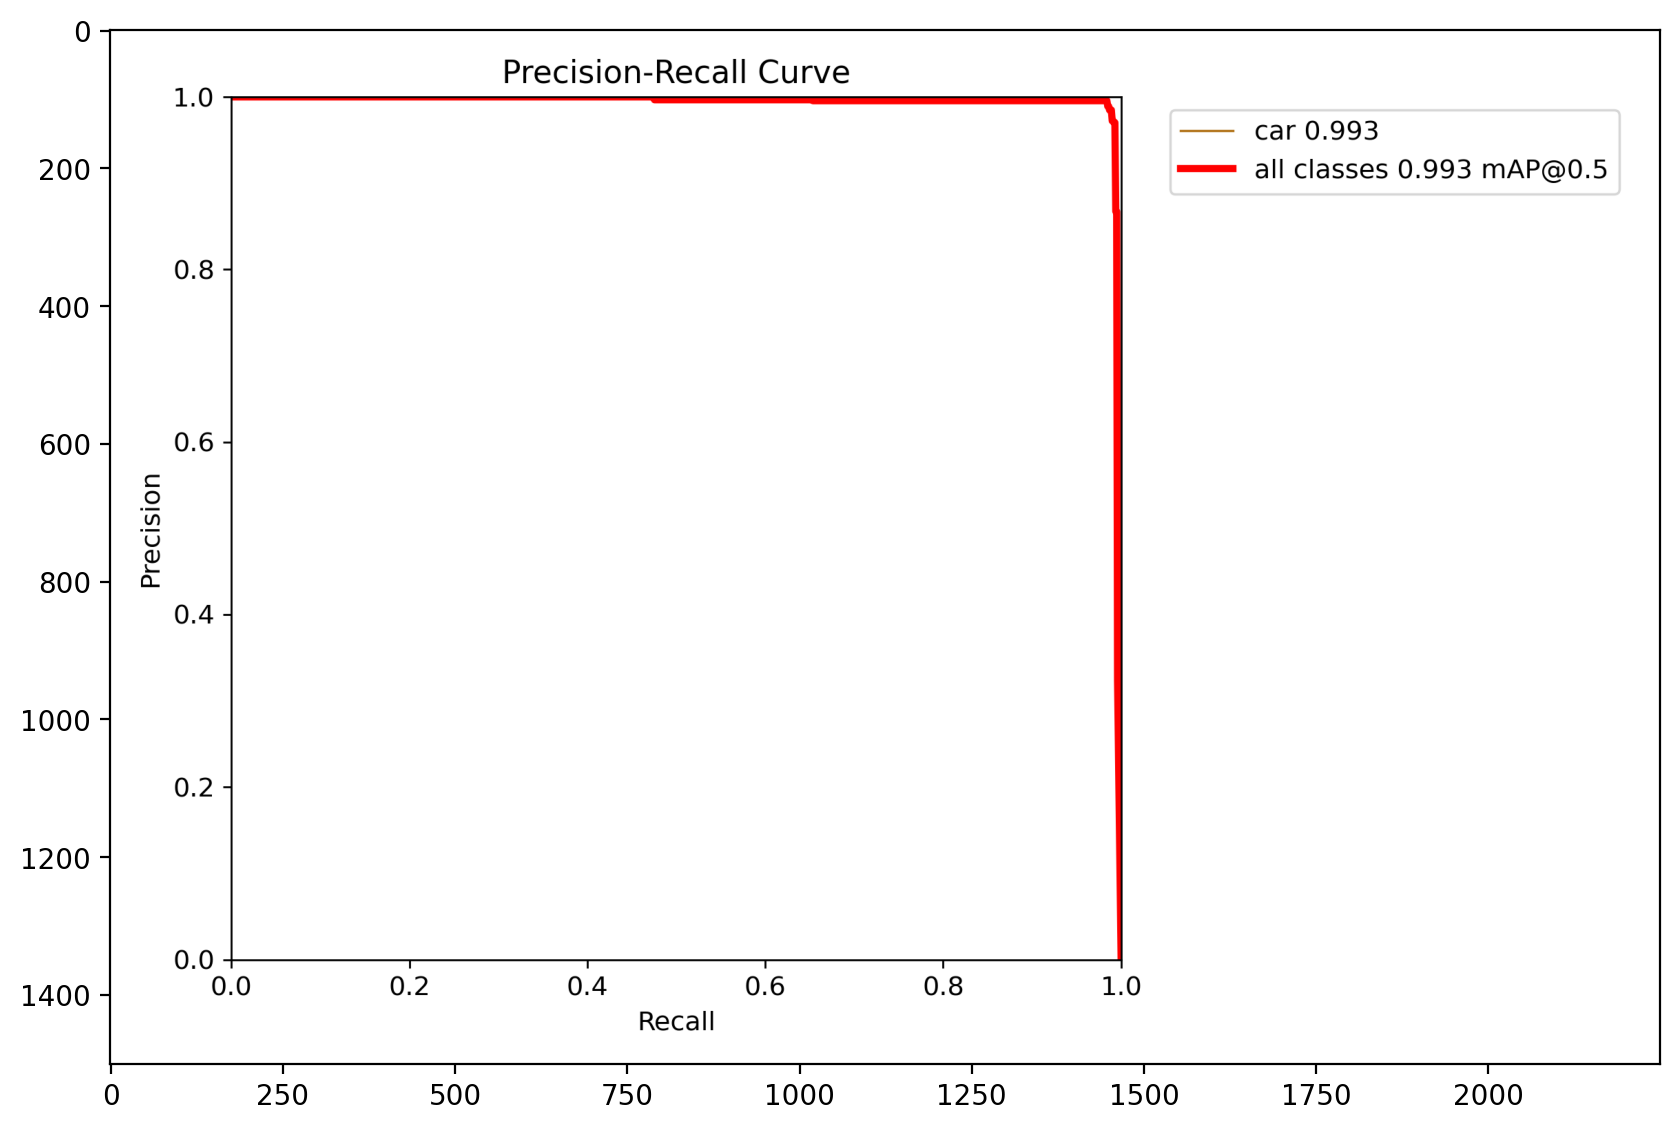

In [ ]:
img_dir = os.path.join(data_dir, '*curve*.png')
files = glob.glob(img_dir)
imgs = []
for image in files:
    result_train(image)

Проведём тест на одном кадре из тестовой выборки

In [ ]:
path_name = '/content/datasets/mydata/mydata/images/test/1 (18)_1649990925.jpg'
image = cv2.imread(path_name)
file_name = os.path.basename(path_name) # "dog.jpg"
filename, ext = file_name.split(".") # "dog", "jpg"

results = model.predict(image)[0]
print(results.boxes.data)


0: 544x640 8 cars, 63.4ms
Speed: 3.6ms preprocess, 63.4ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)
tensor([[5.6472e+02, 4.8266e+02, 6.9200e+02, 7.5089e+02, 9.0894e-01, 0.0000e+00],
        [2.6871e+02, 4.7246e+02, 3.9942e+02, 7.4957e+02, 9.0318e-01, 0.0000e+00],
        [9.8118e+02, 4.7473e+02, 1.0952e+03, 7.3841e+02, 9.0154e-01, 0.0000e+00],
        [8.5528e+02, 4.9635e+02, 9.7155e+02, 7.6790e+02, 8.9876e-01, 0.0000e+00],
        [4.3157e+02, 4.8281e+02, 5.5311e+02, 7.2756e+02, 8.9638e-01, 0.0000e+00],
        [1.1057e+03, 5.0129e+02, 1.1900e+03, 7.4329e+02, 8.9348e-01, 0.0000e+00],
        [7.0815e+02, 5.0273e+02, 8.2844e+02, 7.3158e+02, 8.9249e-01, 0.0000e+00],
        [1.2419e+02, 4.7461e+02, 2.5338e+02, 7.3485e+02, 8.9217e-01, 0.0000e+00]], device='cuda:0')


In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow


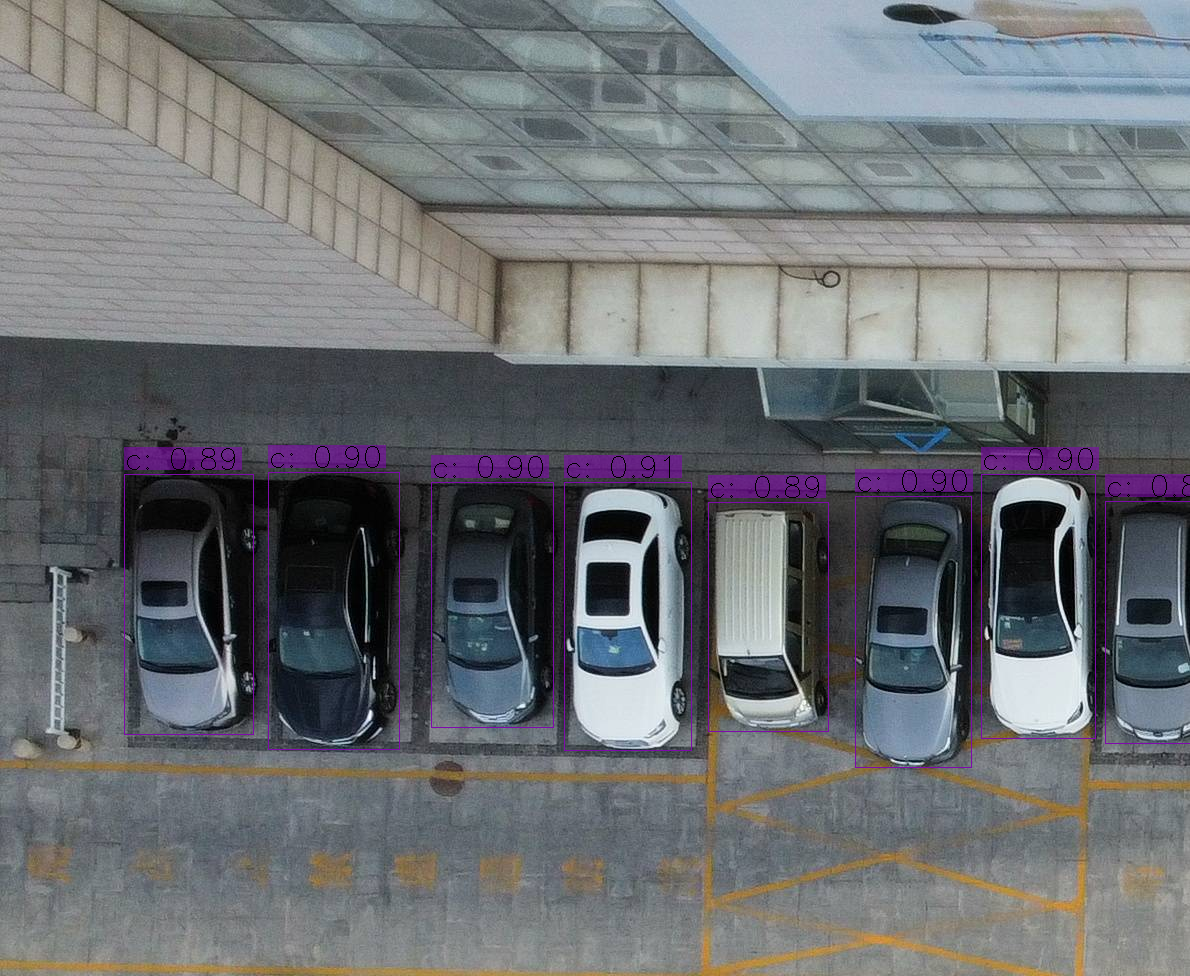

True

In [ ]:
colors = np.random.randint(0, 255, size=(1, 3), dtype="uint8")
thickness = 1
labels = 'car'


for data in results.boxes.data.tolist():
    xmin, ymin, xmax, ymax, confidence, class_id = data
    xmin = int(xmin)
    ymin = int(ymin)
    xmax = int(xmax)
    ymax = int(ymax)
    class_id = int(class_id)

    color = [int(c) for c in colors[class_id]]
    cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color=color, thickness=thickness)
    text = f"{labels[class_id]}: {confidence:.2f}"
    (text_width, text_height) = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, thickness=thickness)[0]
    text_offset_x = xmin
    text_offset_y = ymin - 5
    box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height))
    overlay = image.copy()
    cv2.rectangle(overlay, box_coords[0], box_coords[1], color=color, thickness=cv2.FILLED)
    image = cv2.addWeighted(overlay, 0.6, image, 0.4, 0)
    cv2.putText(image, text, (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=1, color=(0, 0, 0), thickness=thickness)

cv2_imshow(image)

cv2.imwrite(filename + "_yolo11." + ext, image)

Тест показал хорошие резуультаты, нейросеть нашла все машины.

Сделаем из этого кода функцию для удобства и запустим с отложенными для проверки фотографиями

In [ ]:
thickness = 1
labels = 'car'

def prediction(mod, img_p):
    colors = np.random.randint(0, 255, size=(1, 3), dtype="uint8")
    path_name = img_p
    image = cv2.imread(path_name)
    file_name = os.path.basename(path_name) # "dog.jpg"
    filename, ext = file_name.split(".") # "dog", "jpg"

    results = mod.predict(image)[0]
    for data in results.boxes.data.tolist():
        xmin, ymin, xmax, ymax, confidence, class_id = data
        xmin = int(xmin)
        ymin = int(ymin)
        xmax = int(xmax)
        ymax = int(ymax)
        class_id = int(class_id)

        color = [int(c) for c in colors[class_id]]
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color=color, thickness=thickness)
        text = f"{labels[class_id]}: {confidence:.2f}"
        (text_width, text_height) = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, thickness=thickness)[0]
        text_offset_x = xmin
        text_offset_y = ymin - 5
        box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height))
        overlay = image.copy()
        cv2.rectangle(overlay, box_coords[0], box_coords[1], color=color, thickness=cv2.FILLED)
        image = cv2.addWeighted(overlay, 0.6, image, 0.4, 0)
        cv2.putText(image, text, (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=1, color=(0, 0, 0), thickness=thickness)

    cv2_imshow(image)

    cv2.imwrite(filename + "_yolo11." + ext, image)
    return results

In [ ]:
pred = prediction(model, path_name)

In [ ]:
print(f'Количество найденых авто на парковке: {len(pred)}')

8


In [ ]:
path_name = '/content/datasets/mydata/mydata/images/test/2 (43)_1650424073.jpg'

In [ ]:
pred = prediction(model, path_name)

In [ ]:
print(f'Количество найденых авто на парковке: {len(pred)}')

41


In [ ]:
path_name = '/content/datasets/mydata/mydata/images/test/5 (41)_1650424112.jpg'

In [ ]:
pred = prediction(model, path_name)

In [ ]:
print(f'Количество найденых авто на парковке: {len(pred)}')

Количество найденых авто на парковке: 48


Наша нейросеть рисует очертания и говорит кол-во авто припаркованых на фото с высокой скоростью и высокой точностью